# Softwareprojekt | Hate-Speech-Classification (total 32,374 sets)
ML-Ansätze für Hatespeech-Detektion von Twitterposts 

# Import Libraries

In [1]:
#general packages for data manipulation
import os
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
plt.style.use('classic')
#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns 
pd.options.display.max_columns = None

# Daten
Datenimport des vollständigen Datensatzes zur Entwicklung

In [2]:
tweet = pd.read_csv('/kaggle/input/hatespeech/Datensatz_hatespeech.csv',delimiter=',',engine='python',encoding='utf-8-sig')
tweet.head()

,c_text,hatespeech
0,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0
1,@manaf12hassan Die Karte muss in Gesicht von F...,0
2,@Tino_Chrupalla @Karl_Lauterbach Wenn Sie kack...,1
3,@DemokratDer @manuelak62 666,0
4,"@_agronym Junge was für Verfolgung, die befeue...",0


# GERMEVAL 2019

In [3]:
germaneval = pd.read_csv('/kaggle/input/german-eval-2019-task-3/Shared-Task-2019_Data_germeval2019.training_subtask3.csv')
germaneval.head()

,@spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.\tOFFENSE\tINSULT\tEXPLICIT
0,@milenahanm 33 bis 45 habe ich noch gar nicht ...
1,@tagesschau Euere AfD Hetze wirkt. Da könnt ih...
2,"Deutsche Medien, Halbwahrheiten und einseitige..."
3,@Ralf_Stegner Oman Ralle..dich mag ja immer no...
4,@krippmarie Ich kenne noch einige Namen unter ...


In [4]:
germaneval.rename(columns={'@spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.\tOFFENSE\tINSULT\tEXPLICIT': 'c_text'}, inplace=True)
germaneval.head()

,c_text
0,@milenahanm 33 bis 45 habe ich noch gar nicht ...
1,@tagesschau Euere AfD Hetze wirkt. Da könnt ih...
2,"Deutsche Medien, Halbwahrheiten und einseitige..."
3,@Ralf_Stegner Oman Ralle..dich mag ja immer no...
4,@krippmarie Ich kenne noch einige Namen unter ...


In [5]:
from tqdm import tqdm
tqdm.pandas()

germaneval["hatespeech"] = 1
#germaneval.to_csv('data_germaneval_suited.csv', index=False)  

In [6]:
germaneval['c_text'].iloc[0]

'@milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht mir am Arsch vorbei was in dieser Zeit geschehen ist. Ich lebe im heute und jetzt und nicht in der Vergangenheit.\tOFFENSE\tPROFANITY\tEXPLICIT'

In [7]:
germaneval['offense'] = germaneval['c_text'].apply(lambda n: re.sub(r'\tOFFENSE', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tPROFANITY', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tEXPLICIT', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tIMPLICIT', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tABUSE', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tINSULT', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tABUSE', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tABUSE', '',n, flags=re.IGNORECASE))
germaneval['offense'] = germaneval['offense'].apply(lambda n: re.sub(r'\tABUSE', '',n, flags=re.IGNORECASE))
germaneval['c_text'] = germaneval['c_text'].apply(lambda n: re.sub(r'|LBR|', '',n, flags=re.IGNORECASE))

germaneval['c_text'] = germaneval['offense']

germaneval['c_text'].iloc[1]

'@tagesschau Euere AfD Hetze wirkt. Da könnt ihr stolz sein bei #ARD-Fernsehen'

In [8]:
germaneval.head()
germaneval = germaneval.drop('offense', axis=1)

In [9]:
germaneval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      1957 non-null   object
 1   hatespeech  1957 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.7+ KB


In [10]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8132 entries, 0 to 8131
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      8132 non-null   object
 1   hatespeech  8132 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 127.2+ KB


In [11]:
tweet = tweet.append(germaneval)

In [12]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10089 entries, 0 to 1956
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      10089 non-null  object
 1   hatespeech  10089 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 236.5+ KB


# GERMEVAL 2018

In [13]:
# Dataset with NON-Hatespeech
germaneval_18 = pd.read_fwf('/kaggle/input/germeval-18/germeval2018.training.txt')
germaneval_18.rename(columns={'@corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?\tOTHER\tOTHER': 'c_text'}, inplace=True)
germaneval_18.head()

,c_text
0,@Martin28a Sie haben ja auch Recht. Unser Twee...
1,@ahrens_theo fröhlicher gruß aus der schönsten...
2,@dushanwegner Amis hätten alles und jeden gewä...
3,@spdde kein verläßlicher Verhandlungspartner. ...
4,"@Dirki_M Ja, aber wo widersprechen die Zahlen ..."


In [14]:
germaneval_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   c_text  5008 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [15]:
germaneval_18["hatespeech"] = 1
germaneval_18['c_text'].iloc[1102]

'@bjoernstritzel @BILD Schickt diese ISIS-Schlampe nach Syrien!✈️\tOFFENSE\tABUSE'

In [16]:
germaneval_18["hatespeech"] = np.select([germaneval_18['c_text'].str.contains('\tOFFENSE'), germaneval_18['c_text'].str.contains('\tOTHER')],[1,0], default=0)
germaneval_18.head()

,c_text,hatespeech
0,@Martin28a Sie haben ja auch Recht. Unser Twee...,0
1,@ahrens_theo fröhlicher gruß aus der schönsten...,0
2,@dushanwegner Amis hätten alles und jeden gewä...,0
3,@spdde kein verläßlicher Verhandlungspartner. ...,1
4,"@Dirki_M Ja, aber wo widersprechen die Zahlen ...",0


In [17]:
germaneval_18['c_text'] = germaneval_18['c_text'].apply(lambda n: re.sub(r'\tOFFENSE', '',n, flags=re.IGNORECASE))
germaneval_18['c_text'] = germaneval_18['c_text'].apply(lambda n: re.sub(r'\tOTHER', '',n, flags=re.IGNORECASE))
germaneval_18['c_text'] = germaneval_18['c_text'].apply(lambda n: re.sub(r'\tABUSE', '',n, flags=re.IGNORECASE))
germaneval_18['c_text'] = germaneval_18['c_text'].apply(lambda n: re.sub(r'\tINSULT', '',n, flags=re.IGNORECASE))
germaneval_18['c_text'] = germaneval_18['c_text'].apply(lambda n: re.sub(r'\tPROFANITY', '',n, flags=re.IGNORECASE))
germaneval_18['c_text'] = germaneval_18['c_text'].apply(lambda n: re.sub(r'|LBR|', '',n, flags=re.IGNORECASE))

In [18]:
germaneval_18['c_text'].iloc[12]

'Den Türken ist die Souveränität der Niederlande egal. Sie wollen dort || bestimmen. So geht das nicht. Ausweisen, wem das nicht passt.'

In [19]:
germaneval_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      5008 non-null   object
 1   hatespeech  5008 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.4+ KB


In [20]:
tweet = tweet.append(germaneval_18)

In [21]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15097 entries, 0 to 5007
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      15097 non-null  object
 1   hatespeech  15097 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.8+ KB


# HASOC 2019

In [22]:
# Dataset with NON-Hatespeech
hasoc_19 = pd.read_csv('/kaggle/input/hasoc-2019/german_dataset.tsv', sep='\t', header=0)
hasoc_19.rename(columns={'text': 'c_text'}, inplace=True)

hasoc_19.head()

,text_id,c_text,task_1,task_2
0,hasoc_de_1,Frank Rennicke – Ich bin stolz https://t.co/Cm...,NOT,NONE
1,hasoc_de_2,ANSEHEN.....und danach bitte TEILEN...TEILEN.....,NOT,NONE
2,hasoc_de_3,#Koeln Mohamed erkennt kein deutsches Recht so...,NOT,NONE
3,hasoc_de_4,#SaudiArabien ist eine brutale islamische Dikt...,NOT,NONE
4,hasoc_de_5,Bundespolizei #München hat im 1. Quartal 2019 ...,NOT,NONE


In [23]:
hasoc_19["hatespeech"] = np.select([hasoc_19['task_1'].str.contains('HOF'), hasoc_19['task_1'].str.contains('NOT')],[1,0], default=0)
hasoc_19.head()

,text_id,c_text,task_1,task_2,hatespeech
0,hasoc_de_1,Frank Rennicke – Ich bin stolz https://t.co/Cm...,NOT,NONE,0
1,hasoc_de_2,ANSEHEN.....und danach bitte TEILEN...TEILEN.....,NOT,NONE,0
2,hasoc_de_3,#Koeln Mohamed erkennt kein deutsches Recht so...,NOT,NONE,0
3,hasoc_de_4,#SaudiArabien ist eine brutale islamische Dikt...,NOT,NONE,0
4,hasoc_de_5,Bundespolizei #München hat im 1. Quartal 2019 ...,NOT,NONE,0


In [24]:
hasoc_19["hatespeech"].value_counts()

0    3412
1     407
Name: hatespeech, dtype: int64

In [25]:
hasoc_19['c_text'] = hasoc_19['c_text'].apply(lambda n: re.sub(r'|LBR|', '',n, flags=re.IGNORECASE))
hasoc_19 = hasoc_19.drop('text_id', axis=1)
hasoc_19 = hasoc_19.drop('task_2', axis=1)
hasoc_19 = hasoc_19.drop('task_1', axis=1)

In [26]:
hasoc_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      3819 non-null   object
 1   hatespeech  3819 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.8+ KB


In [27]:
tweet = tweet.append(hasoc_19)
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18916 entries, 0 to 3818
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      18916 non-null  object
 1   hatespeech  18916 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 443.3+ KB


# Toxic Comments Corpus (EN --> DE)
Korpus mit 150,000 sets und ca. 13,000 hs classifizierten sets

In [28]:
# Dataset with Hatespeech
toxic = pd.read_csv('/kaggle/input/toxic-comments-corpus/df_toxic_comments.csv', header=0)

toxic = toxic.drop('c_text', axis=1)
toxic = toxic.drop('length', axis=1)
toxic = toxic.drop('hatespeech', axis=1)

toxic.rename(columns={'text_EN': 'c_text'}, inplace=True)
toxic["hatespeech"] = 1


toxic.head()

,c_text,hatespeech
0,"COCKSUCKER, BEVOR SIE AUF MEINER ARBEIT PISSEN",1
1,Hey... was ist das... @ | sich unterhalten . W...,1
2,"Wiedersehen! Schauen Sie nicht, kommen Sie nic...",1
3,"FICK DEINE SCHMUTZIGE MUTTER IN DEN ARSCH, TRO...",1
4,"Es tut mir leid Es tut mir leid, dass ich mit ...",1


In [29]:
toxic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13458 entries, 0 to 13457
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      13458 non-null  object
 1   hatespeech  13458 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 210.4+ KB


In [30]:
tweet = tweet.append(toxic)
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32374 entries, 0 to 13457
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_text      32374 non-null  object
 1   hatespeech  32374 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 758.8+ KB


In [31]:
#view one of the tweets randomly 
random = np.random.randint(0,len(tweet))
print(random)
tweet.iloc[random]['c_text']

14875


'@MonikaBergholz1 Und kochen mit saisonalen Produkten vom Markt.. Erdbeeren im Winter sind garantiert behandelt. Wenig Fleisch. Nüsse.'

# Feature Creation

In [32]:
!pip install advertools
import advertools as adv
from tqdm import tqdm
tqdm.pandas()

#Emojiscore
def emoji_anzahl(text):
    emojis_dict = adv.extract_emoji(text)
    emoji_anzahl = emojis_dict['overview']['num_emoji']
    
    return emoji_anzahl

#Textlänge in Wörtern 
tokenizer = TweetTokenizer(preserve_case=True)

def count_words():
    tweet['tokens'] = tweet['c_text'].progress_apply(tokenizer.tokenize)
    tweet['c(c_text)'] = tweet['tokens'].progress_apply(len)

count_words()
tweet["c(emojis)"] = tweet["c_text"].progress_apply(lambda n : emoji_anzahl(n))

tweet= tweet.drop('tokens', axis=1)
tweet.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.5/271.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 5.6 MB/s eta 0:00:00
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=51aee239657556036d8d442aa3052d180f61c7bfebfa7ee67f26bfceb1f0a26c
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher


100%|██████████| 32374/32374 [10:42<00:00, 50.36it/s]


,c_text,hatespeech,c(c_text),c(emojis)
0,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0,14,1
1,@manaf12hassan Die Karte muss in Gesicht von F...,0,16,0
2,@Tino_Chrupalla @Karl_Lauterbach Wenn Sie kack...,1,32,0
3,@DemokratDer @manuelak62 666,0,3,0
4,"@_agronym Junge was für Verfolgung, die befeue...",0,29,0


### Sentiment Analysis

In [33]:
sentiments = pd.read_csv('/kaggle/input/labelset/feature_engineering_sentiment.csv')
sentiments.head()

,c_text,hatespeech,c(c_text),c(emojis),text_EN
0,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...
1,@manaf12hassan Die Karte muss in Gesicht von F...,0,16,0,@manaf12hassan The card must be pulled up in t...
2,@Tino_Chrupalla @Karl_Lauterbach Wenn Sie kack...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...
3,@DemokratDer @manuelak62 666,0,3,0,@DemokratDer @manuelak62 666
4,"@_agronym Junge was für Verfolgung, die befeue...",0,29,0,"@_agronym Boy, what a persecution, they fire l..."


In [34]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 954.0 kB/s eta 0:00:00


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj= SentimentIntensityAnalyzer()

In [36]:
print(sid_obj.polarity_scores(sentiments['text_EN'].iloc[0])) 

{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}


In [37]:
tweet = tweet.reset_index(drop=True)
sentiments = sentiments.reset_index(drop=True)

tweet=tweet.join(sentiments['text_EN'])

In [38]:
tweet.head()

,c_text,hatespeech,c(c_text),c(emojis),text_EN
0,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...
1,@manaf12hassan Die Karte muss in Gesicht von F...,0,16,0,@manaf12hassan The card must be pulled up in t...
2,@Tino_Chrupalla @Karl_Lauterbach Wenn Sie kack...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...
3,@DemokratDer @manuelak62 666,0,3,0,@DemokratDer @manuelak62 666
4,"@_agronym Junge was für Verfolgung, die befeue...",0,29,0,"@_agronym Boy, what a persecution, they fire l..."


In [39]:
tweet['sentiment_neg'] = tweet['text_EN'].progress_apply(lambda n : sid_obj.polarity_scores(n)['neg'])
tweet['sentiment_neu'] = tweet['text_EN'].progress_apply(lambda n : sid_obj.polarity_scores(n)['neu'])
tweet['sentiment_pos'] = tweet['text_EN'].progress_apply(lambda n : sid_obj.polarity_scores(n)['pos'])
tweet['sentiment_comp'] = tweet['text_EN'].progress_apply(lambda n : sid_obj.polarity_scores(n)['compound'])
tweet.head()

100%|██████████| 32374/32374 [00:08<00:00, 3849.76it/s]


,c_text,hatespeech,c(c_text),c(emojis),text_EN,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_comp
0,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0.000,0.781,0.219,0.6369
1,@manaf12hassan Die Karte muss in Gesicht von F...,0,16,0,@manaf12hassan The card must be pulled up in t...,0.000,1.000,0.000,0.0000
2,@Tino_Chrupalla @Karl_Lauterbach Wenn Sie kack...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...,0.340,0.537,0.123,-0.8898
3,@DemokratDer @manuelak62 666,0,3,0,@DemokratDer @manuelak62 666,0.000,1.000,0.000,0.0000
4,"@_agronym Junge was für Verfolgung, die befeue...",0,29,0,"@_agronym Boy, what a persecution, they fire l...",0.188,0.812,0.000,-0.7003


In [40]:
#create a copy of the original data to work with 
df = tweet.copy()

In [41]:
compression_opts = dict(method='zip',archive_name='input.csv')  
df.to_csv('input_sets.zip', index=False,
          compression=compression_opts)  

# Text Pre-Processing

In [42]:
#Prüfung auf NaN im Datensatz
tweet.isnull().sum() #771 Datensätze haben ein NaN in ['target']

#Entfernen der NaN aus Datensatz
tweet = tweet.dropna()
tweet.isnull().sum() #0 Datensätze haben ein NaN in ['target']

c_text            0
hatespeech        0
c(c_text)         0
c(emojis)         0
text_EN           0
sentiment_neg     0
sentiment_neu     0
sentiment_pos     0
sentiment_comp    0
dtype: int64

In [43]:
#remove all the user handles --> strings starting with @
df['c_text'].replace(r'@\w+','',regex=True,inplace=True)
df['c_text'].head()

0       Meine Liebe.. Sie bilden sich anscheinend a...
1     Die Karte muss in Gesicht von Frau Merkel und...
2      Wenn Sie kackbraune Scheiße blau übermalen w...
3                                                  666
4     Junge was für Verfolgung, die befeuern aus ih...
Name: c_text, dtype: object

In [44]:
df['c_text'].replace(r'http\S+','',regex=True,inplace=True)
df['c_text'].head()

0       Meine Liebe.. Sie bilden sich anscheinend a...
1     Die Karte muss in Gesicht von Frau Merkel und...
2      Wenn Sie kackbraune Scheiße blau übermalen w...
3                                                  666
4     Junge was für Verfolgung, die befeuern aus ih...
Name: c_text, dtype: object

In [45]:
#tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['c_text_tokens'] = df['c_text'].apply(tokenizer.tokenize)
df.head(3)

,c_text,hatespeech,c(c_text),c(emojis),text_EN,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_comp,c_text_tokens
0,Meine Liebe.. Sie bilden sich anscheinend a...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0.00,0.781,0.219,0.6369,"[Meine, Liebe, .., Sie, bilden, sich, anschein..."
1,Die Karte muss in Gesicht von Frau Merkel und...,0,16,0,@manaf12hassan The card must be pulled up in t...,0.00,1.000,0.000,0.0000,"[Die, Karte, muss, in, Gesicht, von, Frau, Mer..."
2,Wenn Sie kackbraune Scheiße blau übermalen w...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...,0.34,0.537,0.123,-0.8898,"[Wenn, Sie, kackbraune, Scheiße, blau, übermal..."


In [46]:
stop_words = stopwords.words('german')

#add additional stop words to be removed from the text
additional_list = ['Die', 'Das', 'Und', 'mal', 'ja', 'schon', 'mehr', 'immer', 'Aber', 'Wenn']
#Die, Das, Und, mal, ja, schon, mehr

for words in additional_list:
    stop_words.append(words)

def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text    

In [47]:
df['c_text_tokens'] = df['c_text_tokens'].apply(remove_stopwords)
df['c_text_tokens'].head()

0      [Meine, Liebe, .., Sie, bilden, anscheinend, 🧐]
1    [Karte, Gesicht, Frau, Merkel, Herr, spahn, ho...
2    [Sie, kackbraune, Scheiße, blau, übermalen, kl...
3                                                [666]
4    [Junge, Verfolgung, ,, befeuern, Eigentumswohn...
Name: c_text_tokens, dtype: object

In [48]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)    

In [49]:
df['c_text_tokens'] = df['c_text_tokens'].apply(remove_hashsymbols)

In [50]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)   

In [51]:
df['c_text_tokens'] = df['c_text_tokens'].apply(rem_digits)

In [52]:
df['c_text_tokens'] = df['c_text_tokens'].apply(tokenizer.tokenize)

In [53]:
emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
        u"\U00002500-\U00002BEF" # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" # dingbats
        u"\u3030"
        "]+", 
        flags=re.UNICODE,
    )

def rem_emojis(text):
    '''Function to remove the emojis from the list of strings'''
    no_emojis = []
    for word in text:
        no_emojis.append(re.sub(emoji_pattern,'',word))
    return ' '.join(no_emojis)

In [54]:
df['c_text_tokens'] = df['c_text_tokens'].apply(rem_emojis)

In [55]:
df['c_text_tokens'] = df['c_text_tokens'].apply(tokenizer.tokenize)

In [56]:
def rem_punctuation(text):
    '''Function to remove the punctuation from the list of strings'''
    no_punc = []
    for word in text:
        no_punc.append(re.sub(r'[^\w\s]','',word))
    return ' '.join(no_punc)   

In [57]:
df['c_text_tokens'] = df['c_text_tokens'].apply(rem_punctuation)

In [58]:
df['c_text_tokens'] = df['c_text_tokens'].apply(tokenizer.tokenize)

In [59]:
df.head()

,c_text,hatespeech,c(c_text),c(emojis),text_EN,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_comp,c_text_tokens
0,Meine Liebe.. Sie bilden sich anscheinend a...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0.000,0.781,0.219,0.6369,"[Meine, Liebe, Sie, bilden, anscheinend]"
1,Die Karte muss in Gesicht von Frau Merkel und...,0,16,0,@manaf12hassan The card must be pulled up in t...,0.000,1.000,0.000,0.0000,"[Karte, Gesicht, Frau, Merkel, Herr, spahn, ho..."
2,Wenn Sie kackbraune Scheiße blau übermalen w...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...,0.340,0.537,0.123,-0.8898,"[Sie, kackbraune, Scheiße, blau, übermalen, kl..."
3,666,0,3,0,@DemokratDer @manuelak62 666,0.000,1.000,0.000,0.0000,[]
4,"Junge was für Verfolgung, die befeuern aus ih...",0,29,0,"@_agronym Boy, what a persecution, they fire l...",0.188,0.812,0.000,-0.7003,"[Junge, Verfolgung, befeuern, Eigentumswohnung..."


# Exploratory Data Analysis


### Check for data balance

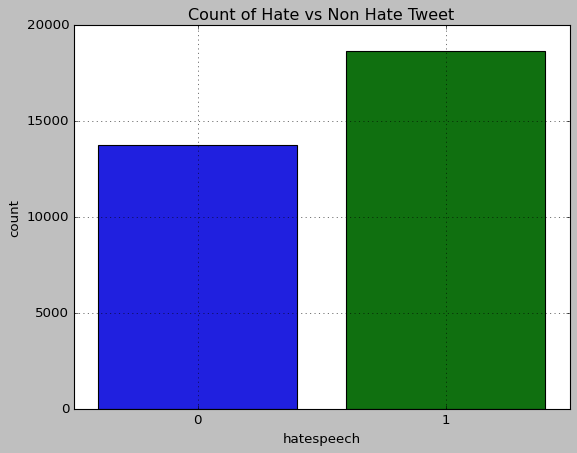

In [60]:
#plot of the count of hate and non hate tweet
sns.countplot(df['hatespeech'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.savefig('Dist.png')
plt.show()

_There are more non hatespeeches than the hatespeech in the dataset_

In [61]:
df['hatespeech'].value_counts()

1    18646
0    13728
Name: hatespeech, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32374 entries, 0 to 32373
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   c_text          32374 non-null  object 
 1   hatespeech      32374 non-null  int64  
 2   c(c_text)       32374 non-null  int64  
 3   c(emojis)       32374 non-null  int64  
 4   text_EN         32374 non-null  object 
 5   sentiment_neg   32374 non-null  float64
 6   sentiment_neu   32374 non-null  float64
 7   sentiment_pos   32374 non-null  float64
 8   sentiment_comp  32374 non-null  float64
 9   c_text_tokens   32374 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 2.5+ MB



### Check out the top terms in the tweets

In [63]:
from collections import Counter
results = Counter()
df['c_text_tokens'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('Sie', 7699), ('Ich', 5151), ('Du', 2705), ('Es', 1629), ('Was', 1253), ('Der', 1136), ('SIE', 1115), ('hast', 1088), ('Wikipedia', 1061), ('einfach', 1014)]


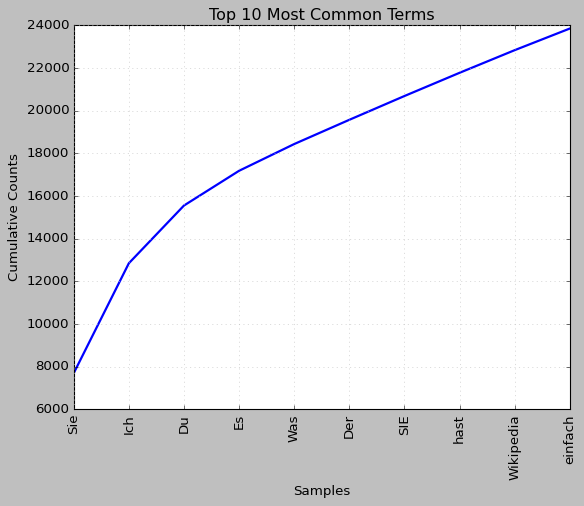

In [64]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

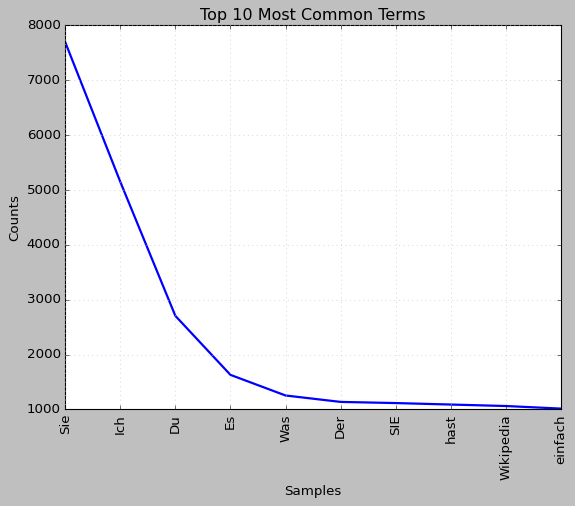

In [65]:
#plot the frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

# Predictive Modeling

### _Data Formatting for Predictive Modeling_

In [66]:
df.head()

,c_text,hatespeech,c(c_text),c(emojis),text_EN,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_comp,c_text_tokens
0,Meine Liebe.. Sie bilden sich anscheinend a...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0.000,0.781,0.219,0.6369,"[Meine, Liebe, Sie, bilden, anscheinend]"
1,Die Karte muss in Gesicht von Frau Merkel und...,0,16,0,@manaf12hassan The card must be pulled up in t...,0.000,1.000,0.000,0.0000,"[Karte, Gesicht, Frau, Merkel, Herr, spahn, ho..."
2,Wenn Sie kackbraune Scheiße blau übermalen w...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...,0.340,0.537,0.123,-0.8898,"[Sie, kackbraune, Scheiße, blau, übermalen, kl..."
3,666,0,3,0,@DemokratDer @manuelak62 666,0.000,1.000,0.000,0.0000,[]
4,"Junge was für Verfolgung, die befeuern aus ih...",0,29,0,"@_agronym Boy, what a persecution, they fire l...",0.188,0.812,0.000,-0.7003,"[Junge, Verfolgung, befeuern, Eigentumswohnung..."


In [67]:
#check for the null values
df.isnull().sum()

c_text            0
hatespeech        0
c(c_text)         0
c(emojis)         0
text_EN           0
sentiment_neg     0
sentiment_neu     0
sentiment_pos     0
sentiment_comp    0
c_text_tokens     0
dtype: int64

In [68]:
#join the tokens back to form the string
df['c_text_tokens'] = df['c_text_tokens'].apply(lambda x: ' '.join(x))

In [69]:
#check the top rows
df.head(3)

,c_text,hatespeech,c(c_text),c(emojis),text_EN,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_comp,c_text_tokens
0,Meine Liebe.. Sie bilden sich anscheinend a...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0.00,0.781,0.219,0.6369,Meine Liebe Sie bilden anscheinend
1,Die Karte muss in Gesicht von Frau Merkel und...,0,16,0,@manaf12hassan The card must be pulled up in t...,0.00,1.000,0.000,0.0000,Karte Gesicht Frau Merkel Herr spahn hoch gezogen
2,Wenn Sie kackbraune Scheiße blau übermalen w...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...,0.34,0.537,0.123,-0.8898,Sie kackbraune Scheiße blau übermalen kleine A...


# Profanity score

In [70]:
hate_dict = pd.read_csv('/kaggle/input/profanities-in-english-collection/profanity_en.csv')

def hate_score_tokens(text):
    dictionary = hate_dict['canonical_form_1']
    score = 0
   
    for word in text:
        if dictionary.eq(word).any():
            index= int(hate_dict.index[hate_dict['canonical_form_1'] == word][0])
            score = score + hate_dict['severity_rating'].iloc[index]
            
    return score

In [71]:
df['c_text_tokens_EN'] = df['text_EN'].apply(tokenizer.tokenize)

In [72]:
df['profanity_score'] = df['c_text_tokens_EN'].progress_apply(lambda n : hate_score_tokens(n))

100%|██████████| 32374/32374 [04:17<00:00, 125.78it/s]


# Feature Engineering

In [73]:
#split the data into input X and output y
X = df['c_text_tokens']
y = df['hatespeech']

In [74]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#instantiate the vectorizer 
vectorizer = TfidfVectorizer(max_features=5000)
#fit on the training data
X = vectorizer.fit_transform(X)
X.shape

(32374, 5000)

In [75]:
df.head()

,c_text,hatespeech,c(c_text),c(emojis),text_EN,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_comp,c_text_tokens,c_text_tokens_EN,profanity_score
0,Meine Liebe.. Sie bilden sich anscheinend a...,0,14,1,@Laika66753508 @MartinaWeiss48 @reitschuster M...,0.000,0.781,0.219,0.6369,Meine Liebe Sie bilden anscheinend,"[@Laika66753508, @MartinaWeiss48, @reitschuste...",0.0
1,Die Karte muss in Gesicht von Frau Merkel und...,0,16,0,@manaf12hassan The card must be pulled up in t...,0.000,1.000,0.000,0.0000,Karte Gesicht Frau Merkel Herr spahn hoch gezogen,"[@manaf12hassan, The, card, must, be, pulled, ...",0.0
2,Wenn Sie kackbraune Scheiße blau übermalen w...,1,32,0,@Tino_Chrupalla @Karl_Lauterbach If you paint ...,0.340,0.537,0.123,-0.8898,Sie kackbraune Scheiße blau übermalen kleine A...,"[@Tino_Chrupalla, @Karl_Lauterbach, If, you, p...",2.0
3,666,0,3,0,@DemokratDer @manuelak62 666,0.000,1.000,0.000,0.0000,,"[@DemokratDer, @manuelak62, 666]",0.0
4,"Junge was für Verfolgung, die befeuern aus ih...",0,29,0,"@_agronym Boy, what a persecution, they fire l...",0.188,0.812,0.000,-0.7003,Junge Verfolgung befeuern Eigentumswohnungen Q...,"[@_agronym, Boy, ,, what, a, persecution, ,, t...",0.0


In [76]:
# Features for CL
combinedFeatures = np.hstack([df[['c(c_text)', 'c(emojis)','sentiment_neg','sentiment_pos', 'sentiment_neu', 'sentiment_comp','profanity_score']], X.toarray()])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32374 entries, 0 to 32373
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c_text            32374 non-null  object 
 1   hatespeech        32374 non-null  int64  
 2   c(c_text)         32374 non-null  int64  
 3   c(emojis)         32374 non-null  int64  
 4   text_EN           32374 non-null  object 
 5   sentiment_neg     32374 non-null  float64
 6   sentiment_neu     32374 non-null  float64
 7   sentiment_pos     32374 non-null  float64
 8   sentiment_comp    32374 non-null  float64
 9   c_text_tokens     32374 non-null  object 
 10  c_text_tokens_EN  32374 non-null  object 
 11  profanity_score   32374 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 3.0+ MB


In [78]:
#split the data 
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2 #20% of the data in the 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['hatespeech'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25899, 5000) (6475, 5000) (25899,) (6475,)


In [79]:
#check the shape
X_train.shape, X_test.shape

((25899, 5000), (6475, 5000))

In [80]:
#RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {y_res}")
print(f"Testing target statistics: {y_test}")

Training target statistics: 0        0
1        0
2        0
3        0
4        0
        ..
21959    1
21960    1
21961    1
21962    1
21963    1
Name: hatespeech, Length: 21964, dtype: int64
Testing target statistics: 7885     0
29249    1
18080    0
22045    1
28218    1
        ..
14030    0
4042     0
7611     0
14332    0
7387     0
Name: hatespeech, Length: 6475, dtype: int64


In [81]:
#check the shape
X_res.shape, y_res.shape

((21964, 5000), (21964,))

In [82]:
X_train = X_res
y_train = y_res

_The f1 score of both the training and testing set has improved compared to the plain vanilla Logistic Regression model. There is still more opportunity to improve the score using better models or even handling the data imbalance by adding synthetic data_

# Vergleich der Modellperformance

In [83]:
import time

# Model building: Ordinary Logistic Regression

In [84]:
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [85]:
start = time.time()

#instantiate the models with default hyper-parameters
max_itera = 10000
clf_LR = LogisticRegression(max_iter=max_itera)
clf_LR.fit(X_train,y_train)
LR_train_predictions = clf_LR.predict(X_train)
LR_test_predictions = clf_LR.predict(X_test)

time_LR= time.time()-start

# python 3
print('It took',time_LR, 'seconds.')

It took 0.1921231746673584 seconds.


In [86]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [87]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,LR_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,LR_test_predictions))

Accuracy Score on training set 0.88185
Accuracy Score on test set 0.83259


In [88]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,LR_train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.84      0.94      0.89     10982
           1       0.93      0.83      0.88     10982

    accuracy                           0.88     21964
   macro avg       0.89      0.88      0.88     21964
weighted avg       0.89      0.88      0.88     21964



In [89]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,LR_test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2746
           1       0.91      0.79      0.84      3729

    accuracy                           0.83      6475
   macro avg       0.83      0.84      0.83      6475
weighted avg       0.85      0.83      0.83      6475



# Model building: SVM

In [90]:
#import the models
from sklearn.svm import SVC

In [91]:
start=time.time()

#instantiate the models with default hyper-parameters
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train,y_train)
SVM_train_predictions = svclassifier.predict(X_train)
SVM_test_predictions = svclassifier.predict(X_test)

time_SVM= time.time()-start

# python 3
print('It took',time_SVM, 'seconds.')

It took 76.76966285705566 seconds.


In [92]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [93]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,SVM_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,SVM_test_predictions))

Accuracy Score on training set 0.89519
Accuracy Score on test set 0.83475


In [94]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,SVM_train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10982
           1       0.94      0.84      0.89     10982

    accuracy                           0.90     21964
   macro avg       0.90      0.90      0.89     21964
weighted avg       0.90      0.90      0.89     21964



In [95]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,SVM_test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2746
           1       0.92      0.78      0.85      3729

    accuracy                           0.83      6475
   macro avg       0.84      0.84      0.83      6475
weighted avg       0.85      0.83      0.84      6475



# Model building: NaiveBayes

In [96]:
#import the models
from sklearn.naive_bayes import MultinomialNB

In [97]:
start= time.time()
#instantiate the models with default hyper-parameters
nbclassifier = MultinomialNB()
nbclassifier.fit(X_train,y_train)
NB_train_predictions = nbclassifier.predict(X_train)
NB_test_predictions = nbclassifier.predict(X_test)

time_NB= time.time()-start

# python 3
print('It took',time_NB, 'seconds.')

It took 0.011159181594848633 seconds.


In [98]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [99]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,NB_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,NB_test_predictions))

Accuracy Score on training set 0.86091
Accuracy Score on test set 0.83135


In [100]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,NB_train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.83      0.91      0.87     10982
           1       0.90      0.81      0.85     10982

    accuracy                           0.86     21964
   macro avg       0.86      0.86      0.86     21964
weighted avg       0.86      0.86      0.86     21964



In [101]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,NB_test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2746
           1       0.91      0.78      0.84      3729

    accuracy                           0.83      6475
   macro avg       0.83      0.84      0.83      6475
weighted avg       0.84      0.83      0.83      6475



# Model building: RandomForest

In [102]:
#import the models
from sklearn.ensemble import RandomForestClassifier

In [103]:
start = time.time()

#instantiate the models with default hyper-parameters
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train,y_train)
RF_train_predictions = rfclassifier.predict(X_train)
RF_test_predictions = rfclassifier.predict(X_test)

time_RF= time.time()-start

# python 3
print('It took',time_RF, 'seconds.')

It took 33.651809215545654 seconds.


In [104]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [105]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,RF_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,RF_test_predictions))

Accuracy Score on training set 0.99640
Accuracy Score on test set 0.82363


In [106]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,RF_train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10982
           1       1.00      0.99      1.00     10982

    accuracy                           1.00     21964
   macro avg       1.00      1.00      1.00     21964
weighted avg       1.00      1.00      1.00     21964



In [107]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,RF_test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.76      0.86      0.80      2746
           1       0.88      0.80      0.84      3729

    accuracy                           0.82      6475
   macro avg       0.82      0.83      0.82      6475
weighted avg       0.83      0.82      0.82      6475



# Model building: DecisionTree

In [108]:
#import the models
from sklearn.tree import DecisionTreeClassifier

In [109]:
start = time.time()

#instantiate the models with default hyper-parameters
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)
DT_train_predictions = dtclassifier.predict(X_train)
DT_test_predictions = dtclassifier.predict(X_test)

time_DT= time.time()-start

# python 3
print('It took',time_DT, 'seconds.')

It took 10.947592973709106 seconds.


In [110]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [111]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,DT_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,DT_test_predictions))

Accuracy Score on training set 0.99640
Accuracy Score on test set 0.76757


In [112]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,DT_train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10982
           1       1.00      0.99      1.00     10982

    accuracy                           1.00     21964
   macro avg       1.00      1.00      1.00     21964
weighted avg       1.00      1.00      1.00     21964



In [113]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,DT_test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2746
           1       0.81      0.78      0.79      3729

    accuracy                           0.77      6475
   macro avg       0.76      0.77      0.76      6475
weighted avg       0.77      0.77      0.77      6475



# Model building: RidgeClassifier

In [114]:
#import the models
from sklearn.linear_model import RidgeClassifier

In [115]:
start = time.time()

#instantiate the models with default hyper-parameters
rcclassifier = RidgeClassifier()
rcclassifier.fit(X_train,y_train)
RC_train_predictions = rcclassifier.predict(X_train)
RC_test_predictions = rcclassifier.predict(X_test)

time_RC= time.time()-start

# python 3
print('It took',time_RC, 'seconds.')

It took 0.060358524322509766 seconds.


In [116]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [117]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,RC_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,RC_test_predictions))

Accuracy Score on training set 0.90243
Accuracy Score on test set 0.83089


In [118]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,RC_train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.87      0.94      0.91     10982
           1       0.93      0.87      0.90     10982

    accuracy                           0.90     21964
   macro avg       0.90      0.90      0.90     21964
weighted avg       0.90      0.90      0.90     21964



In [119]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,RC_test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2746
           1       0.90      0.80      0.84      3729

    accuracy                           0.83      6475
   macro avg       0.83      0.84      0.83      6475
weighted avg       0.84      0.83      0.83      6475



# Vergleich der Modellperformance - CV
Cross-Validation

In [120]:
print('Classification Model Performance Report')
print('\n')
print('-HATESPEECH-')
print('\n')

print('Logistic Regression')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,LR_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,LR_test_predictions))
print('Execution time %.5f' % time_LR, 'seconds')
print('\n')

print('SVM')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,SVM_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,SVM_test_predictions))
print('Execution time %.5f' % time_SVM, 'seconds')
print('\n')

print('NaiveBayes')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,NB_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,NB_test_predictions))
print('Execution time %.5f' % time_NB, 'seconds')
print('\n')

print('RandomForest')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,RF_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,RF_test_predictions))
print('Execution time %.5f' % time_RF, 'seconds')
print('\n')

print('DecisionTree')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,DT_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,DT_test_predictions))
print('Execution time %.5f' % time_DT, 'seconds')
print('\n')

print('RidgeClassifier')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,RC_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,RC_test_predictions))
print('Execution time %.5f' % time_RC, 'seconds')
print('\n')

Classification Model Performance Report


-HATESPEECH-


Logistic Regression
Accuracy Score on training set 0.88185
Accuracy Score on test set 0.83259
Execution time 0.19212 seconds


SVM
Accuracy Score on training set 0.89519
Accuracy Score on test set 0.83475
Execution time 76.76966 seconds


NaiveBayes
Accuracy Score on training set 0.86091
Accuracy Score on test set 0.83135
Execution time 0.01116 seconds


RandomForest
Accuracy Score on training set 0.99640
Accuracy Score on test set 0.82363
Execution time 33.65181 seconds


DecisionTree
Accuracy Score on training set 0.99640
Accuracy Score on test set 0.76757
Execution time 10.94759 seconds


RidgeClassifier
Accuracy Score on training set 0.90243
Accuracy Score on test set 0.83089
Execution time 0.06036 seconds




# CV-Scores

In [121]:
#import the required libraries for grid search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [122]:
from sklearn.model_selection import cross_val_score

def cval_scores(clf, k):
    scores = cross_val_score(clf, X=X_train, y=y_train, cv=k)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


    
cval_scores(LogisticRegression(),5)  


CV accuracy scores: [0.8374687  0.83883451 0.8524926  0.83428181 0.8390255 ]
CV accuracy: 0.840 +/- 0.006


# Modelle im Vergleich - 5-Fold-Cross-Validation

In [123]:
print('Classification Model Performance Report')
print('-HATESPEECH-')
print('\n')
print('**5-Fold-Cross-Validation**')
print('\n')

print('#Logistic Regression#')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,LR_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,LR_test_predictions))
print(cval_scores(LogisticRegression(),5))
print('\n')

print('#SVM#')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,SVM_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,SVM_test_predictions))
print(cval_scores(SVC(),5))
print('\n')

print('#NaiveBayes#')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,NB_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,NB_test_predictions))
print(cval_scores(MultinomialNB(),5))
print('\n')

print('#RandomForest#')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,RF_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,RF_test_predictions))
print(cval_scores(RandomForestClassifier(),5))
print('\n')

print('#DecisionTree#')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,DT_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,DT_test_predictions))
print(cval_scores(DecisionTreeClassifier(),5))
print('\n')

print('#RidgeClassifier#')
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,RC_train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,RC_test_predictions))
print(cval_scores(RidgeClassifier(),5))
print('\n')

Classification Model Performance Report
-HATESPEECH-


**5-Fold-Cross-Validation**


#Logistic Regression#
Accuracy Score on training set 0.88185
Accuracy Score on test set 0.83259
CV accuracy scores: [0.8374687  0.83883451 0.8524926  0.83428181 0.8390255 ]
CV accuracy: 0.840 +/- 0.006
None


#SVM#
Accuracy Score on training set 0.89519
Accuracy Score on test set 0.83475
CV accuracy scores: [0.85385841 0.84930571 0.86273617 0.84748463 0.85132058]
CV accuracy: 0.853 +/- 0.005
None


#NaiveBayes#
Accuracy Score on training set 0.86091
Accuracy Score on test set 0.83135
CV accuracy scores: [0.82927384 0.82472115 0.84634646 0.82995675 0.83492714]
CV accuracy: 0.833 +/- 0.007
None


#RandomForest#
Accuracy Score on training set 0.99640
Accuracy Score on test set 0.82363
CV accuracy scores: [0.82722513 0.82472115 0.83792397 0.82290007 0.81443534]
CV accuracy: 0.825 +/- 0.008
None


#DecisionTree#
Accuracy Score on training set 0.99640
Accuracy Score on test set 0.76757
CV accuracy scores: [0

# Learing Curve

In [124]:
def learning_curve(clf, k):
    plt.figure(figsize=(5, 5))

    rf = clf
    esti.plot_learning_curve(rf, X_train,y_train, title='Learning Curve', 
                         cv=k, n_jobs=1, title_fontsize='large',text_fontsize='medium')
    plt.savefig('L_Curve'+str(clf)+'clf.png')
    plt.show()

<Figure size 400x400 with 0 Axes>

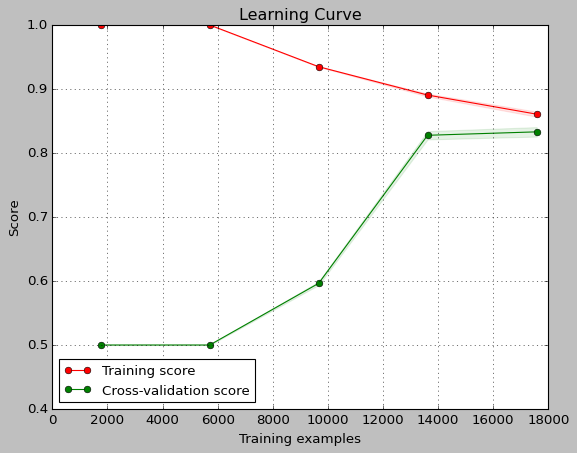

In [125]:
import scikitplot.estimators as esti
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

rf = MultinomialNB()
esti.plot_learning_curve(rf, X_train,y_train, title='Learning Curve', 
                         cv=5, n_jobs=1, title_fontsize='large',text_fontsize='medium')
plt.show()

Classification Model Performance Report
-HATESPEECH-


**5-Fold-Cross-Validation**




<Figure size 400x400 with 0 Axes>

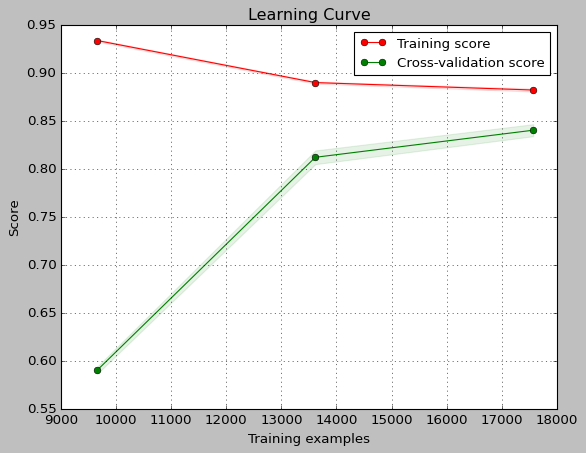

<Figure size 400x400 with 0 Axes>

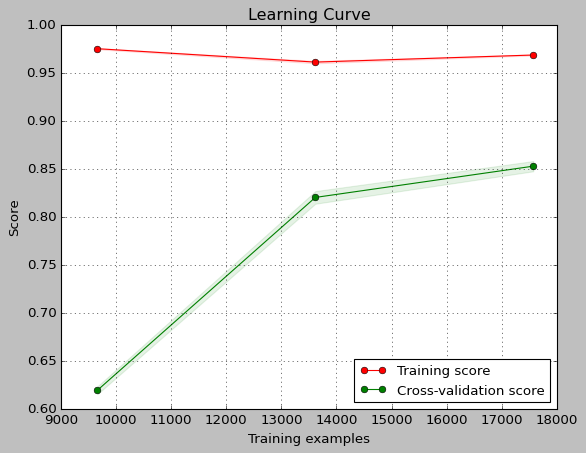

<Figure size 400x400 with 0 Axes>

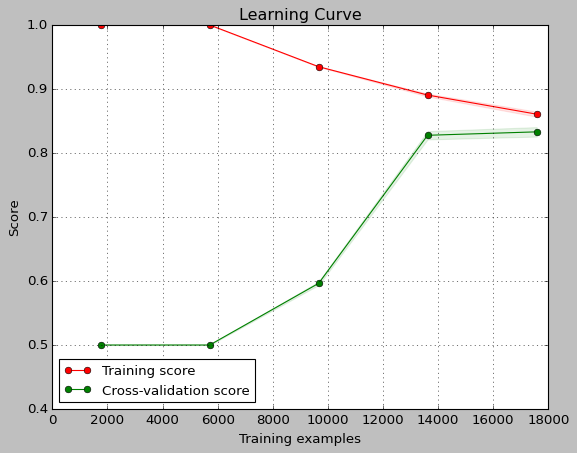

<Figure size 400x400 with 0 Axes>

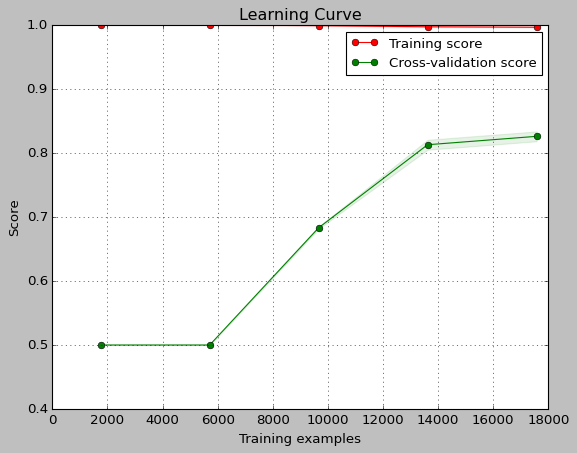

<Figure size 400x400 with 0 Axes>

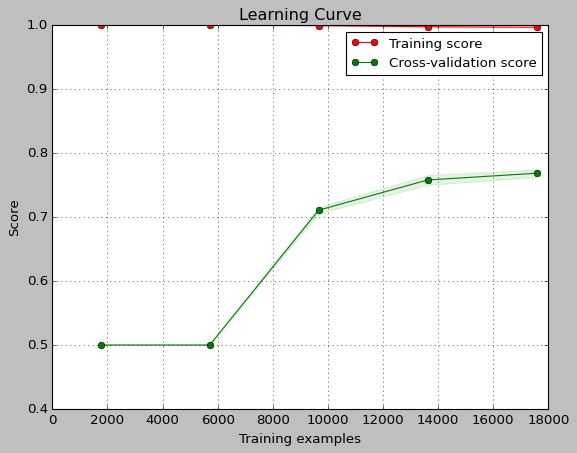

<Figure size 400x400 with 0 Axes>

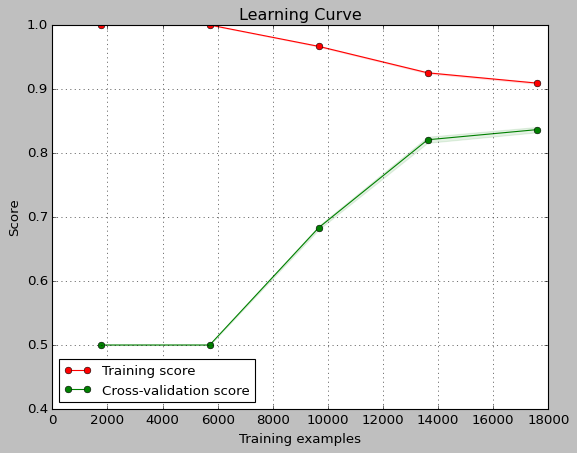

In [126]:
print('Classification Model Performance Report')
print('-HATESPEECH-')
print('\n')
print('**5-Fold-Cross-Validation**')
print('\n')
learning_curve(LogisticRegression(), 5)
print('\n')

print('\n')
learning_curve(SVC(), 5)
print('\n')

print('\n')
learning_curve(MultinomialNB(), 5)
print('\n')

print('\n')
learning_curve(RandomForestClassifier(), 5)
print('\n')

print('\n')
learning_curve(DecisionTreeClassifier(), 5)
print('\n')

print('\n')
learning_curve(RidgeClassifier(), 5)
print('\n')


# CV-Scores

In [127]:
def val_curve(clf, k):
    scores = cross_val_score(clf, X=X_train, y=y_train, cv=k)
    plt.plot(scores, label='validation score', marker='o')
    plt.axhline(np.mean(scores),  label='m', color = 'r', linestyle='dashed')
    plt.axhline(np.mean(scores)+ np.std(scores),  label='std', color = 'g', linestyle='dashed')
    plt.axhline(np.mean(scores)- np.std(scores), color = 'g', linestyle='dashed')

    plt.xlabel('k-fold')
    plt.ylabel('validation score')
    plt.title('Validation Curve: '+str(clf))

    plt.legend()
    plt.savefig(str(clf)+'clf.png')
    plt.show()

Classification Model Performance Report
-HATESPEECH-


**5-Fold-Cross-Validation**




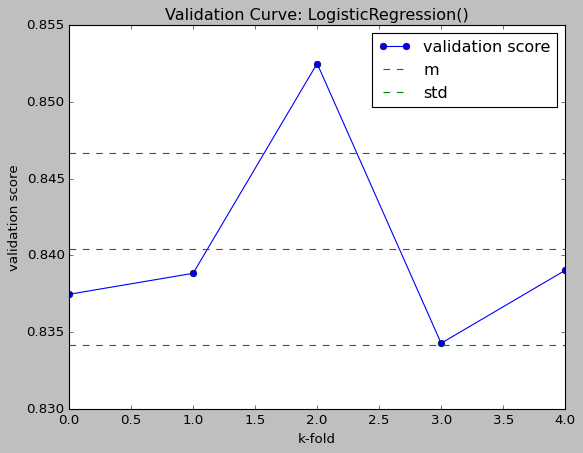

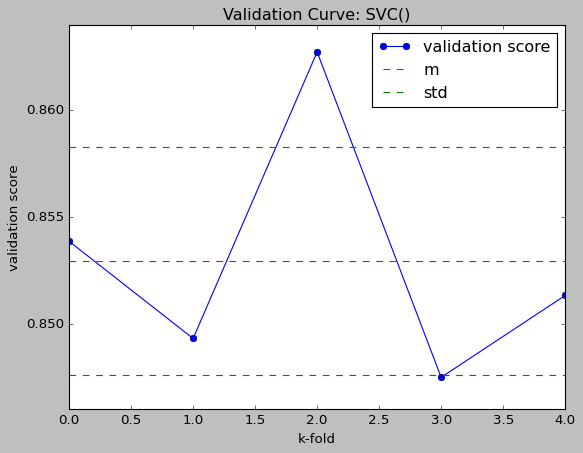

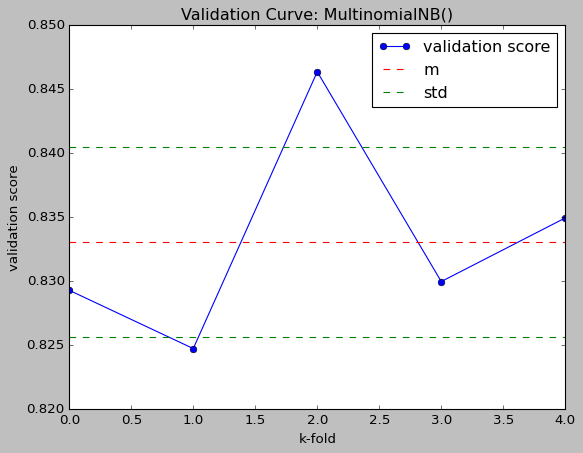

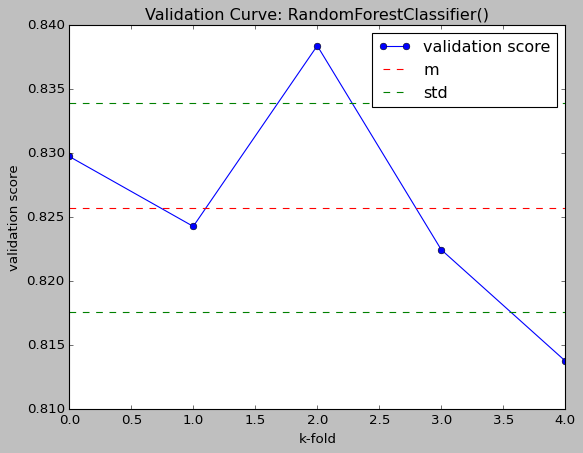

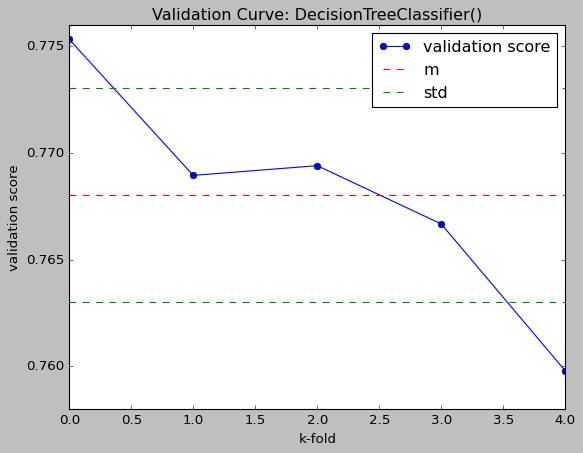

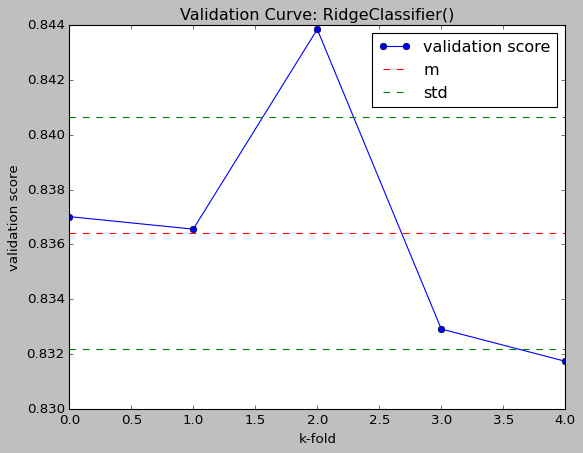

In [128]:
print('Classification Model Performance Report')
print('-HATESPEECH-')
print('\n')
print('**5-Fold-Cross-Validation**')
print('\n')
val_curve(LogisticRegression(), 5)
print('\n')

print('\n')
val_curve(SVC(), 5)
print('\n')

print('\n')
val_curve(MultinomialNB(), 5)
print('\n')

print('\n')
val_curve(RandomForestClassifier(), 5)
print('\n')

print('\n')
val_curve(DecisionTreeClassifier(), 5)
print('\n')

print('\n')
val_curve(RidgeClassifier(), 5)
print('\n')


# Classification Report
Yellow Brick

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2746
           1       0.91      0.79      0.84      3729

    accuracy                           0.83      6475
   macro avg       0.83      0.84      0.83      6475
weighted avg       0.85      0.83      0.83      6475



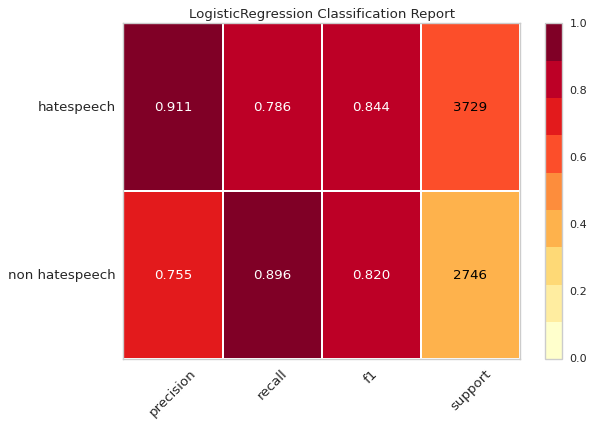

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [129]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,LR_test_predictions))

from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport

# Load the classification dataset

# Specify the target classes
classes = ["non hatespeech", "hatespeech"]

# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [130]:
from matplotlib.pyplot import annotate

In [131]:
def classification_metric(clf):
    classes = ["non hatespeech", "hatespeech"]

    # Instantiate the classification model and visualizer
    model = clf
    visualizer = ClassificationReport(model, classes=classes, support=True)

    visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data

    plt.title('Classification Report Matrix: ' +str(clf))
    visualizer.show(outpath='CM'+str(clf)+".png")

Classification Report Testing set




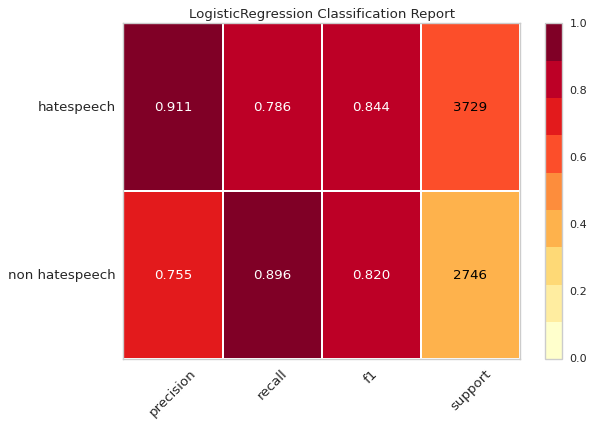

In [132]:
print('Classification Report Testing set')
print('\n')
classification_metric(LogisticRegression())


Classification Report Testing set




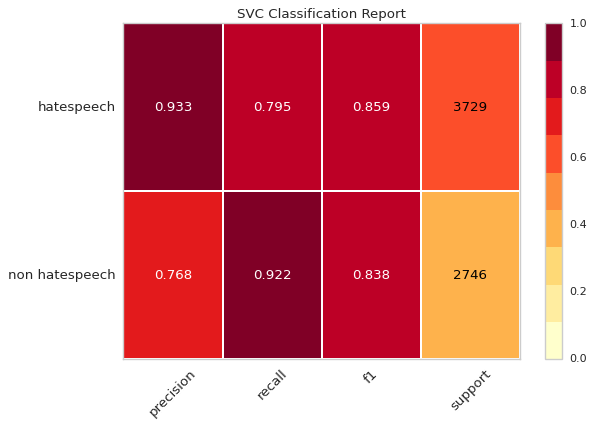

In [133]:
print('Classification Report Testing set')
print('\n')
classification_metric(SVC())


Classification Report Testing set




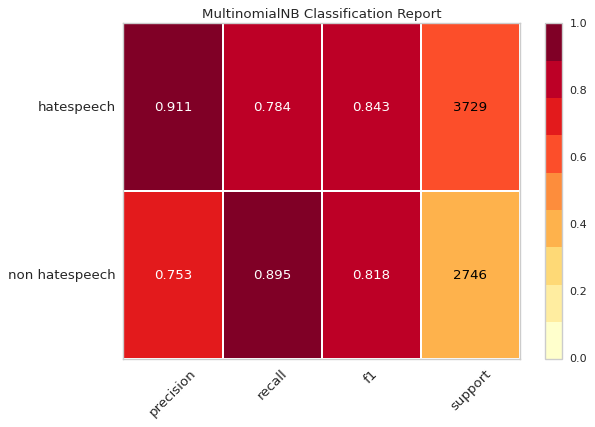

In [134]:

print('Classification Report Testing set')
print('\n')
classification_metric(MultinomialNB())


Classification Report Testing set




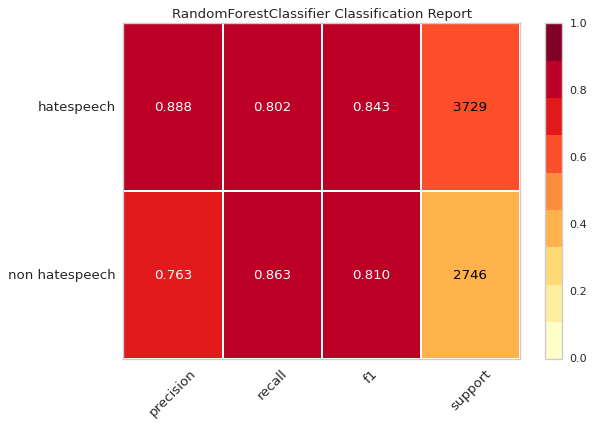

In [135]:

print('Classification Report Testing set')
print('\n')
classification_metric(RandomForestClassifier())


Classification Report Testing set




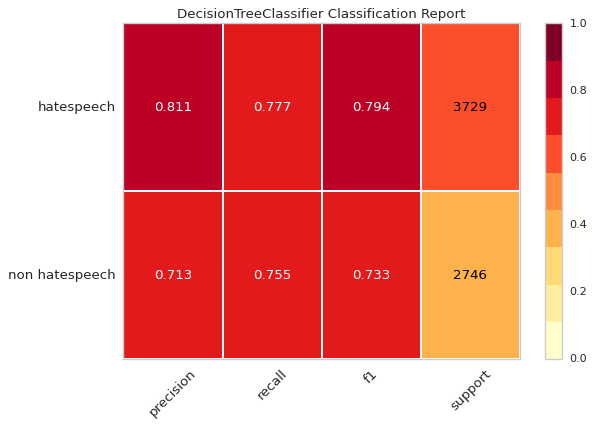

In [136]:

print('Classification Report Testing set')
print('\n')
classification_metric(DecisionTreeClassifier())


Classification Report Testing set




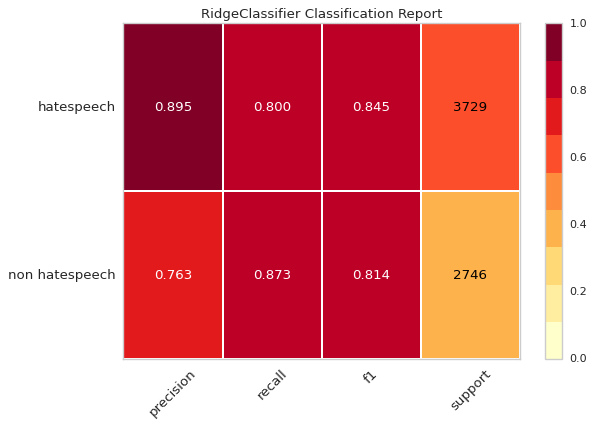

In [137]:

print('Classification Report Testing set')
print('\n')
classification_metric(RidgeClassifier())

In [138]:
compression_opts = dict(method='zip',archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  

# Testdaten Labeling HS

In [139]:
testdaten = pd.read_csv('/kaggle/input/testdaten/Testdaten.tsv', sep='\t')
testdaten.head()

,c_id,c_text,date,author_id,like_count,quote_count,retweet_count,reply_count
0,1.384217e+18,@MichaelBroecker @HeuteBluhm @ArminLaschet @CD...,2021-04-19T18:46:54Z,1.109805e+18,1,0,0,0
1,1.397925e+18,@reitschuster Jetzt beginnt die Wahlwerbung fü...,2021-05-27T14:38:06Z,1.373293e+18,3,0,0,0
2,1.391853e+18,@welt Na wenn DA mal nicht ein paar Querdenker...,2021-05-10T20:30:49Z,1.217412e+18,0,0,0,0
3,1.383950e+18,@Eiterdaus Danke hatte ich schon. Is wie ne Gr...,2021-04-19T01:07:10Z,7.673723e+17,0,0,0,1
4,1.400755e+18,@janboehm Es gibt weitaus wichtigere Punkte um...,2021-06-04T10:04:10Z,1.252295e+18,1109,1,9,19


In [140]:
testdaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   c_id           2034 non-null   float64
 1   c_text         2034 non-null   object 
 2   date           2034 non-null   object 
 3   author_id      2034 non-null   float64
 4   like_count     2034 non-null   int64  
 5   quote_count    2034 non-null   int64  
 6   retweet_count  2034 non-null   int64  
 7   reply_count    2034 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 127.2+ KB


# TEST DURCHLAUF

In [141]:
test_sample_1= [testdaten['c_text'][3]]
print(test_sample_1)

['@Eiterdaus Danke hatte ich schon. Is wie ne Grippe, also nicht ängstlich. Is nur für alte und kranke wirklich gefährlich. Ja das zeigt was du für ein intoleranter, verborter Mensch bist der den Mainstream Müll aus den Medien nachplappert!!! Hauptsache man kann nazi schreiben']


In [142]:
test_vec_1 = vectorizer.transform(test_sample_1)
print(test_vec_1)

  (0, 4847)	0.15028845326524645
  (0, 4738)	0.11709150992456492
  (0, 4702)	0.11017774163512059
  (0, 4598)	0.1012642251050809
  (0, 4225)	0.1293873942265249
  (0, 3657)	0.14730221370851607
  (0, 3648)	0.16638994385133068
  (0, 3140)	0.12966963516784977
  (0, 3089)	0.12023289560765486
  (0, 3041)	0.1485023145959597
  (0, 3038)	0.13854447926833124
  (0, 2996)	0.1562589305606913
  (0, 2849)	0.14976462402898097
  (0, 2816)	0.14741959764990184
  (0, 2779)	0.14067869137935207
  (0, 2773)	0.2083003535549187
  (0, 2510)	0.20315347245644624
  (0, 2367)	0.1509594907656157
  (0, 2283)	0.1257452317344125
  (0, 2265)	0.33541373137094355
  (0, 2142)	0.07088990569864202
  (0, 1963)	0.18353076310203048
  (0, 1958)	0.20315347245644624
  (0, 1846)	0.20315347245644624
  (0, 1598)	0.1887081477995997
  (0, 1540)	0.2748525022651627
  (0, 1072)	0.11532762348765567
  (0, 1012)	0.08483644210838626
  (0, 897)	0.10262836211406545
  (0, 884)	0.2960303118859966
  (0, 841)	0.14253183730051486
  (0, 824)	0.13107187

In [143]:
classification_score_sample = svclassifier.predict(test_vec_1)
print(int(classification_score_sample))

1


### Function call

In [144]:
def clf_predict(text):
    
    input_text=[]
    input_text = [text]
    
    #TFIDF
    X_TEST = vectorizer.transform(input_text)
    
    #Prediction
    classification_score = svclassifier.predict(X_TEST)
    classification_score = int(classification_score)
        
    return classification_score

In [145]:
print(clf_predict(testdaten['c_text'][3]))
print(testdaten['c_text'][3])

1
@Eiterdaus Danke hatte ich schon. Is wie ne Grippe, also nicht ängstlich. Is nur für alte und kranke wirklich gefährlich. Ja das zeigt was du für ein intoleranter, verborter Mensch bist der den Mainstream Müll aus den Medien nachplappert!!! Hauptsache man kann nazi schreiben


# LABEL TEST SET AND EXPORT

In [146]:
testdaten['hatespeech'] = testdaten['c_text'].progress_apply(lambda n : clf_predict(n))

100%|██████████| 2034/2034 [00:10<00:00, 198.15it/s]


In [147]:
testdaten.head(10)

,c_id,c_text,date,author_id,like_count,quote_count,retweet_count,reply_count,hatespeech
0,1.384217e+18,@MichaelBroecker @HeuteBluhm @ArminLaschet @CD...,2021-04-19T18:46:54Z,1.109805e+18,1,0,0,0,0
1,1.397925e+18,@reitschuster Jetzt beginnt die Wahlwerbung fü...,2021-05-27T14:38:06Z,1.373293e+18,3,0,0,0,0
2,1.391853e+18,@welt Na wenn DA mal nicht ein paar Querdenker...,2021-05-10T20:30:49Z,1.217412e+18,0,0,0,0,0
3,1.383950e+18,@Eiterdaus Danke hatte ich schon. Is wie ne Gr...,2021-04-19T01:07:10Z,7.673723e+17,0,0,0,1,1
4,1.400755e+18,@janboehm Es gibt weitaus wichtigere Punkte um...,2021-06-04T10:04:10Z,1.252295e+18,1109,1,9,19,1
5,1.388448e+18,@amo_il_caffe @Dr_Emergencydoc Vor Monaten sch...,2021-05-01T10:59:54Z,7.411392e+17,0,0,0,0,1
6,1.384275e+18,@noaheIeazar @arouet71 @tagesthemen @tagesscha...,2021-04-19T22:38:03Z,1.238851e+18,1,0,0,2,0
7,1.387171e+18,"https://t.co/AykzTbk6Gc #E0105\n9.30 Uhr, Froh...",2021-04-27T22:26:06Z,4.770650e+07,0,1,0,0,0
8,1.400062e+18,@herr_sin @Karl_Lauterbach @Alice_Weidel Perso...,2021-06-02T12:09:39Z,8.380310e+17,1,0,0,0,1
9,1.389253e+18,Cn Naziterror\n\nDu läufst mit paar linken Pat...,2021-05-03T16:18:36Z,9.706050e+17,1,0,0,1,1


In [148]:
testdaten['hatespeech'].value_counts()

1    1041
0     993
Name: hatespeech, dtype: int64

In [149]:
testdaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   c_id           2034 non-null   float64
 1   c_text         2034 non-null   object 
 2   date           2034 non-null   object 
 3   author_id      2034 non-null   float64
 4   like_count     2034 non-null   int64  
 5   quote_count    2034 non-null   int64  
 6   retweet_count  2034 non-null   int64  
 7   reply_count    2034 non-null   int64  
 8   hatespeech     2034 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 143.1+ KB


In [150]:
testdaten = testdaten.drop('c_text', axis=1)
testdaten = testdaten.drop('date', axis=1)
testdaten = testdaten.drop('author_id', axis=1)
testdaten = testdaten.drop('like_count', axis=1)
testdaten = testdaten.drop('quote_count', axis=1)
testdaten = testdaten.drop('retweet_count', axis=1)
testdaten = testdaten.drop('reply_count', axis=1)

In [151]:
testdaten['c_id'] = testdaten['c_id'].progress_apply(lambda n: int(n))
testdaten.head()

100%|██████████| 2034/2034 [00:00<00:00, 439051.74it/s]


,c_id,hatespeech
0,1384216954488049664,0
1,1397925083717410816,0
2,1391853254615699712,0
3,1383950264403587072,1
4,1400755246411005952,1


In [152]:
compression_opts = dict(method='zip',archive_name='Target_Gruppe4_1a.csv')  
testdaten.to_csv('Target_Gruppe4_1a.zip', index=False, compression=compression_opts)  

# Model Comparison

In [153]:
def cv_score(clf,k):
    score = cross_val_score(clf, X=X_train, y=y_train, cv=k)
    return score

results = {'Classifier Name':  ['LogisticRegression', 'MultinomialNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'RidgeClassifier'],
        'acc_train':  [ accuracy_score(y_train,LR_train_predictions), accuracy_score(y_train,NB_train_predictions), accuracy_score(y_train,SVM_train_predictions), accuracy_score(y_train,DT_train_predictions), accuracy_score(y_train,RF_train_predictions), accuracy_score(y_train,RC_train_predictions)],
        'acc_test':  [ accuracy_score(y_test,LR_test_predictions), accuracy_score(y_test,NB_test_predictions), accuracy_score(y_test,SVM_test_predictions), accuracy_score(y_test,DT_test_predictions), accuracy_score(y_test,RF_test_predictions), accuracy_score(y_test,RC_test_predictions)],
        'mean_cv_score(5)':  [np.mean(cv_score(LogisticRegression(),5)), np.mean(cv_score(MultinomialNB(),5)), np.mean(cv_score(SVC(),5)), np.mean(cv_score(DecisionTreeClassifier(),5)), np.mean(cv_score(RandomForestClassifier(),5)),np.mean(cv_score(RidgeClassifier(),5))],
        'std_cv_score(5)':  [np.std(cv_score(LogisticRegression(),5)), np.std(cv_score(MultinomialNB(),5)), np.std(cv_score(SVC(),5)), np.std(cv_score(DecisionTreeClassifier(),5)), np.std(cv_score(RandomForestClassifier(),5)),np.std(cv_score(RidgeClassifier(),5))]}

results = pd.DataFrame(results)

results.head(6)

,Classifier Name,acc_train,acc_test,mean_cv_score(5),std_cv_score(5)
0,LogisticRegression,0.881852,0.832587,0.840421,0.006270
1,MultinomialNB,0.860909,0.831351,0.833045,0.007396
2,SVC,0.895192,0.834749,0.852941,0.005337
3,DecisionTreeClassifier,0.996403,0.767568,0.768302,0.001775
4,RandomForestClassifier,0.996403,0.823629,0.826443,0.007681
5,RidgeClassifier,0.902431,0.830888,0.836414,0.004234


In [154]:
compression_opts = dict(method='zip',archive_name='results_of_classification.csv')  
results.to_csv('HSC_results_additional.zip', index=False, compression=compression_opts) 